In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\Ricy\Tianchi\Data\TianChi-master\[new] yancheng_train_20171226.csv')

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def handleRatedPassenger(x):
    if '-' in x:
        arr = x.split('-')
        return (float(arr[0]) + float(arr[1]))/2
    else:
        return float(x)

df['rated_passenger'] = df['rated_passenger'].apply(handleRatedPassenger)
fileName = 'ratedPassengerDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


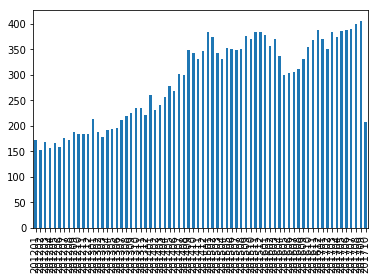

In [4]:
df = pd.read_csv(fileName)
# ts = df['sale_date'].value_counts().sort_index().cumsum().plot()
df['sale_date'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

In [5]:
# df.groupby(['class_id', 'sale_date']).size().sort_values()

In [6]:
for header in list(df):
    if header in ('sale_date', 'class_id', 'sale_quantity', 'price'):
        print()
    else:
        print(header + ': ', df[header].unique())




brand_id:  [ 12 637 831 750  98 537 807 638  75 106 450 872 953 985 864 304 692 761
 836 290 783 814 497 813 923 512 498 841 542 236 294  49 126  68 682  76]
compartment:  [2 3 1]
type_id:  [1 2 3 4]
level_id:  ['1' '2' '3' '4' '-' '5']
department_id:  [1 2 3 4 5 6 7]
TR:  ['6' '5' '0' '8' '7' '9' '4' '1' '8;7' '5;4']
gearbox_type:  ['MT' 'DCT' 'AT' 'CVT' 'AMT' 'AT;DCT' 'MT;AT']
displacement:  [ 1.8  1.6  1.5  2.   1.3  1.2  3.   2.5  1.4  1.   2.4  0.   2.7  1.1  2.3
  2.8  3.1  1.9  3.6]
if_charging:  ['L' 'T']
price_level:  ['8-10W' '10-15W' '5WL' '15-20W' '5-8W' '25-35W' '35-50W' '20-25W' '50-75W']

driven_type_id:  [1 2 3]
fuel_type_id:  [1 2 3 4 '1' '2' '3' '-']
newenergy_type_id:  [1 2 3 4]
emission_standards_id:  [1 2 3 5]
if_MPV_id:  [2 1]
if_luxurious_id:  [1 2]
power:  [98.0 94.0 105.0 81.0 82.0 114.0 101.0 80.0 110.0 193.0 90.0 84.0 132.0
 155.0 100.0 115.0 83.0 93.8 93.0 96.0 187.0 162.0 86.0 133.0 89.0 137.0
 121.0 165.0 135.0 102.0 130.0 123.0 92.0 112.0 95.0 200.0 85

In [7]:
'-' in df['sale_quantity'].unique()

c:\ricy\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

In [8]:
# produce the classDic which contains
classDicBasic = {}
for index, row in df.iterrows():
    if row['class_id'] not in classDicBasic:
        jump = False
        for subIndex, value in row.items():
            if value == '-' and subIndex != 'price':
                jump = True
        if not jump:
            classDicBasic[row['class_id']] = row

# for index, row in classDicBasic.items():
#     for subIndex, value in row.iteritems():
#         if value == '-' and subIndex != 'price': 
#             print('subIndex: ', subIndex, ' value: ', value)
# for key in df['class_id'].unique():
#     if key not in classDicBasic.keys():
#         print(key)
# for index, row in df.iterrows():
#     if row['class_id'] in [527765]:
#         if row['engine_torque'] != '-':
#             print('index: ', index, ' engine_torque: ', row['engine_torque'])

In [9]:
# fill in the value, not include price and 527765, 178529
classIds = classDicBasic.keys()
for index, row in df.iterrows():
    classId = row['class_id']
    for subIndex, value in row.iteritems():
        if value == '-':
            if classId in classIds:
                item = classDicBasic[classId]
                if subIndex != 'price':
                    row[subIndex] = item[subIndex]
                    df.set_value(index, subIndex, item[subIndex])

In [10]:
# Check the value whether is right
for index, row in df.iterrows():
    for subIndex, value in row.iteritems():
        if value == '-':
            if subIndex != 'price' and row['class_id'] not in [178529, 527765]:
                print(index, subIndex, value)

In [11]:
## save to excel after handling fuel_type_id
fileName = 'fuelTypeDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

In [12]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\fuelTypeDone.csv')
import re
for index, row in df.iterrows():
    if not(isinstance(row['TR'], int) or isinstance(row['TR'], float)):
        if re.search(';', row['TR']):
            nums = row['TR'].split(';')
            trNum = (int(nums[0]) + int(nums[1]))/2
            df.set_value(index, 'TR', trNum)
        else:
            if not isinstance(row['TR'], float):
                df.set_value(index, 'TR', float(row['TR']))

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
fileName = 'trDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

In [14]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\trDone.csv')

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
# handle if_MPV_id, if_luxurious_id
capitalizer = lambda x:x-1
df['if_MPV_id'] = df['if_MPV_id'].apply(capitalizer)
df['if_luxurious_id'] = df['if_luxurious_id'].apply(capitalizer)

In [16]:
# handle if_charging
def mapCharging(x):
    if x == 'L':
        return 1
    else:
        return 0
df['if_charging'] = df['if_charging'].apply(mapCharging)

fileName = 'mpvChargingDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

# index = pd.date_range('1/1/2000', periods=8)
# s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
# df = pd.DataFrame(np.random.randn(8, 3), index=index, 
#                   columns=['A', 'B', 'C'])
# wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],
#               major_axis=pd.date_range('1/1/2000', periods=5),
#               minor_axis=['A', 'B', 'C', 'D'])
# long_series = pd.Series(np.random.randn(1000))

In [17]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)

def mapPriceLevel(x):
    arr = x.split('-')
    if len(arr) < 2:
        return float(arr[0].split('W')[0])/2
    else:
        subArr = arr[1].split('W')
        return (float(arr[0]) + float(subArr[0]))/2

df['price_level'] = df['price_level'].apply(mapPriceLevel)

fileName = 'priceLevelDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)
# split date to month and year
def operateDateToYear(x):
    return x[:4]
def operateDateToMonth(x):
    return x[4:]
df['sale_date'] = df['sale_date'].astype('str')

df['year'] = df['sale_date'].apply(operateDateToYear)
df['month'] = df['sale_date'].apply(operateDateToMonth)

fileName = 'saleDateDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)
df = pd.get_dummies(df, columns=['year', 'month', 'class_id', 'brand_id', 'type_id', 'department_id', 'gearbox_type',
                             'driven_type_id', 'fuel_type_id', 'newenergy_type_id', 'emission_standards_id'])
fileName = 'oneHotDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)
# map level_id power engine_torque to float, handle 81/70
def toFloat(x):
    if isinstance(x, str):
        if '/' in x:
            arr = x.split('/')
            num = (float(arr[0])+float(arr[1]))/2
            return num
        elif x != '-':
            return float(x)
    return x

df['level_id'] = df['level_id'].apply(toFloat)
df['power'] = df['power'].apply(toFloat)
df['engine_torque'] = df['engine_torque'].apply(toFloat)
fileName = 'levelPowerEngineDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)
# delete items contain '-'
condition1 = df['level_id'] == '-'
condition2 = df['engine_torque'] == '-'
df.drop(df[condition1 | condition2].index, inplace=True)
df = df.drop(['price', 'sale_date'], axis=1)

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df = df.astype(float)
corr = df.corr()
for columnName in df.columns:
    if columnName not in corr.columns:
        print(columnName)

In [22]:
# corr.loc['level_id']
corr = corr.sort_values(by='level_id')

In [23]:
corr['level_id']

driven_type_id_1          -0.289333
if_MPV_id                 -0.261072
brand_id_750              -0.194660
brand_id_692              -0.145108
class_id_425432           -0.127165
brand_id_12               -0.124700
brand_id_985              -0.124423
class_id_745137           -0.123171
class_id_349023           -0.121484
class_id_354068           -0.120917
gearbox_type_DCT          -0.118179
class_id_409854           -0.116583
class_id_290854           -0.112855
class_id_321683           -0.112703
class_id_628041           -0.112400
class_id_347384           -0.112095
class_id_304458           -0.107752
department_id_6           -0.103926
class_id_714152           -0.103895
car_width                 -0.096608
department_id_5           -0.095618
type_id_1                 -0.095059
class_id_580470           -0.094504
class_id_735971           -0.094325
class_id_713651           -0.092700
class_id_819061           -0.092700
class_id_472603           -0.091969
class_id_175962           -0

In [24]:
# corr.loc['level_id']
corr = corr.sort_values(by='engine_torque')
corr['engine_torque']

if_charging               -0.725803
gearbox_type_MT           -0.396338
driven_type_id_1          -0.297876
department_id_5           -0.189942
type_id_3                 -0.181989
rated_passenger           -0.172652
department_id_1           -0.165886
class_id_248352           -0.158550
sale_quantity             -0.154966
brand_id_98               -0.151527
department_id_3           -0.143905
class_id_914348           -0.127024
brand_id_831              -0.119339
class_id_576298           -0.118766
brand_id_304              -0.118766
class_id_621073           -0.115125
brand_id_692              -0.114357
brand_id_106              -0.113220
class_id_354068           -0.112613
class_id_265980           -0.107351
class_id_347384           -0.098423
class_id_175962           -0.097997
class_id_651347           -0.096496
class_id_560265           -0.094217
brand_id_923              -0.094217
class_id_304458           -0.094052
class_id_349023           -0.092638
brand_id_783              -0

In [25]:
levelIdInput = ['gearbox_type', 'driven_type','fuel_type','newenergy_type','emission_standards']
engineTorqueInput = ['if_charging', 'car_length','displacement','wheelbase','rear_track','if_luxurious_id',
                    'front_track','car_width','total_quality','price_level','equipment_quality','power']
levelIdInputColumnList = []
engineTorqueInputColumnList = []
for column in df.columns.values:
    for levelInput in levelIdInput:
        if levelInput in column:
            levelIdInputColumnList.append(column)
    for engineInput in engineTorqueInput:
        if engineInput in column:
            engineTorqueInputColumnList.append(column)

print(levelIdInputColumnList)
print(engineTorqueInputColumnList)

['gearbox_type_AMT', 'gearbox_type_AT', 'gearbox_type_AT;DCT', 'gearbox_type_CVT', 'gearbox_type_DCT', 'gearbox_type_MT', 'gearbox_type_MT;AT', 'driven_type_id_1', 'driven_type_id_2', 'driven_type_id_3', 'fuel_type_id_1', 'fuel_type_id_2', 'fuel_type_id_3', 'fuel_type_id_4', 'newenergy_type_id_1', 'newenergy_type_id_2', 'newenergy_type_id_3', 'newenergy_type_id_4', 'emission_standards_id_1', 'emission_standards_id_2', 'emission_standards_id_3', 'emission_standards_id_5']
['displacement', 'if_charging', 'price_level', 'if_luxurious_id', 'power', 'car_length', 'car_width', 'total_quality', 'equipment_quality', 'wheelbase', 'front_track', 'rear_track']


In [26]:
levelIdInputData = df.loc[:, levelIdInputColumnList]
levelIdOutputData = df.loc[:, 'level_id']
engineTorqueInputData = df.loc[:, engineTorqueInputColumnList]
engineTorqueOutputData = df.loc[:, 'engine_torque']
levelIdOutputData.values

array([ 1.,  1.,  2., ...,  2.,  3.,  3.])

In [27]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

x1 = levelIdInputData.values
y1 = levelIdOutputData.values
x2 = engineTorqueInputData.values
y2 = engineTorqueOutputData.values

lr1 = linear_model.LinearRegression()
lr2 = linear_model.LinearRegression()

lr1.fit(x1, y1)
lr2.fit(x2, y2)
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
# predicted = cross_val_predict(lr, x, y, cv=10)

# fig, ax = plt.subplots()
# ax.scatter(y, predicted, edgecolors=(0, 0, 0))
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)
# delete items contain '-'
condition1 = df['level_id'] == '-'
condition2 = df['engine_torque'] == '-'

levelIdpredictData = df[condition1]
levelIdpredictIndex = levelIdpredictData.index
levelIdpredictInput = levelIdpredictData.loc[:, levelIdInputColumnList]

engineTorquePredictData = df[condition2]
engineTorquePredictIndex = engineTorquePredictData.index
engineTorquePredictInput = engineTorquePredictData.loc[:, engineTorqueInputColumnList]

c:\ricy\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
levelIdPredictResult = lr1.predict(levelIdpredictInput.values)
engineTorquePredictResult = lr2.predict(engineTorquePredictInput.values)

index1 = 0
index2 = 0 
for levelIndex in levelIdpredictIndex:
    if df.loc[levelIndex, 'level_id'] != '-':
        print('---')
    else:
        df.loc[levelIndex, 'level_id'] = round(levelIdPredictResult[index1])
    index1 = index1 + 1

for engineIndex in engineTorquePredictIndex:
    if df.loc[engineIndex, 'engine_torque'] != '-':
        print('!!!')
    else:
        df.loc[engineIndex, 'engine_torque'] = engineTorquePredictResult[index2]
    index2 = index2 + 1

In [30]:
fileName = 'levelIdEngineDone.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

In [31]:
fileName = 'levelIdEngineDone.csv'
df = pd.read_csv('C:\\Ricy\\Tianchi\\'+fileName)
geaboxDf = pd.read_csv('C:\\Ricy\\Tianchi\\gearbox_type_one_hot.csv')

In [32]:
for column in df.columns:
    if 'gearbox' in column:
        print(column)

gearbox_type_AMT
gearbox_type_AT
gearbox_type_AT;DCT
gearbox_type_CVT
gearbox_type_DCT
gearbox_type_MT
gearbox_type_MT;AT


In [33]:
df = df.drop(['gearbox_type_AMT', 'gearbox_type_AT', 'gearbox_type_AT;DCT', 'gearbox_type_CVT', 'gearbox_type_DCT',
'gearbox_type_MT',
'gearbox_type_MT;AT', 'sale_date', 'price'], axis = 1)

df = pd.concat([df, geaboxDf], axis=1)

In [34]:
df.astype(float)
fileName = 'final.csv'
df.to_csv(fileName, encoding='utf-8', index=False)